## <span style="color:blue">  Numerical exercises 3</span>
### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$
By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:
1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>
### For comparison, Black-Scholes analytic solution: (basically same code)

In [5]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Commenti sull'implementazione

L'evoluzione stocastica del prezzo dell'asset $S(t)$ è modellata secondo l'equazione del GBM in un mercato neutrale al rischio, dove il tasso di deriva istantaneo è il tasso di interesse risk-free, $r$.

1.  **Campionamento diretto del prezzo finale $S(T)$**:
    Questo metodo calcola il prezzo dell'asset alla scadenza $T$ in un unico passo temporale. La simulazione si basa sulla soluzione analitica dell'equazione differenziale stocastica del GBM:
    $$S(T) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma Z\sqrt{T}\right]$$
    dove $S(0)$ è il prezzo iniziale, $\sigma$ è la volatilità, $T$ è la scadenza e $Z$ è una variabile casuale estratta da una distribuzione Normale standard $\mathcal{N}(0,1)$. Le funzioni `OptionPriceDirect` e `PriceEvo` implementano questa logica.

2.  **Campionamento del percorso discretizzato**:
    Questo approccio simula l'evoluzione del prezzo dell'asset discretizzando l'intervallo temporale $[0, T]$ in $N_{steps}=100$ sotto-intervalli di ampiezza $\Delta t = T/N_{steps}$. Il prezzo ad ogni passo $t_{i+1}$ viene calcolato ricorsivamente a partire dal prezzo al passo precedente $t_i$:
    $$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)\Delta t +\sigma Z_{i+1}\sqrt{\Delta t}\right]$$
    dove $Z_{i+1}$ è una nuova variabile casuale $\mathcal{N}(0,1)$. La funzione `OptionPriceDiscretized` esegue questo ciclo per 100 passi per ottenere una stima di $S(T)$.

Per ogni simulazione di $S(T)$, il programma calcola il payoff dell'opzione alla scadenza:
-   **Call option**: $C = \max(0, S(T) - K)$
-   **Put option**: $P = \max(0, K - S(T))$

Il valore del payoff viene quindi attualizzato al tempo $t=0$ tramite il fattore di sconto $e^{-rT}$. Il prezzo finale dell'opzione è la media di questi valori attualizzati su un totale di $M=100.000$ simulazioni.

Per stimare l'incertezza statistica dei risultati, il codice implementa il metodo del **data blocking**. Le $M$ simulazioni totali vengono suddivise in $N=100$ blocchi. Per ogni blocco viene calcolata la media dei prezzi delle opzioni. Successivamente, il programma calcola la media progressiva e l'errore standard della media al crescere del numero di blocchi considerati, utilizzando la funzione `ComputeBlockStatistics`.

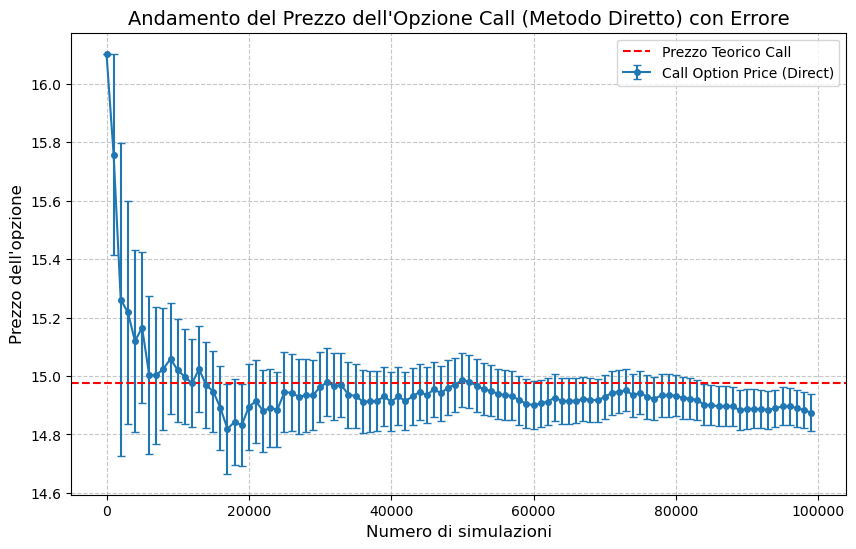

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000          # Numero totale di lanci/simulazioni (come nel C++)
N = 100             # Numero di blocchi (come nel C++)
L = int(M / N)      # Simulazioni per blocco (come nel C++)

# Inizializza liste vuote per memorizzare i due tipi di dati
average = []
error = []

# --- Lettura dei dati dal file ---
# Apri il file in modalità di lettura
try:
    with open('Output_Call_Direct', 'r') as file:
        for line in file:
            # Suddividi la riga in due parti basandoti su uno spazio
            part1, part2 = line.split()

            # Aggiungi i dati suddivisi alle rispettive liste, convertendo le stringhe in float
            average.append(float(part1))
            error.append(float(part2))
except FileNotFoundError:
    print("ERRORE: Il file 'Output_Call_Direct' non è stato trovato.")
    print("Assicurati che il codice C++ sia stato compilato ed eseguito")
    print("e che il file 'Output_Call_Direct' sia nella stessa directory.")
    exit() # Esci dallo script se il file non è presente

# Stampa le due liste separate (utile per il debugging)
#print("Dati medi (Average):", average[:5], "...") # Stampa solo i primi 5 per non appesantire l'output
# print("Dati errore (Error):", error[:5], "...") # Stampa solo i primi 5 per non appesantire l'output
# print(f"Numero di punti dati letti: {len(average)}")

# Converti le liste in array NumPy (vettori)
average = np.array(average)
error = np.array(error)

# --- Preparazione dell'asse x per il plotting ---
# Inizializza x con la lunghezza effettiva dei dati letti (len(average) che sarà uguale a N dal C++),
# quindi moltiplica per L per ottenere il "Time" corretto.
x = np.arange(len(average)) * L

# --- Plotting dei risultati ---
plt.figure(figsize=(10, 6)) # Opzionale: imposta la dimensione della figura
plt.errorbar(x, average, yerr=error, fmt='-o', markersize=4, capsize=3, label='Call Option Price (Direct)')
plt.axhline(y=14.975790778311286, color='r', linestyle='--', label='Prezzo Teorico Call')
plt.legend()
plt.xlabel('Numero di simulazioni', fontsize=12)
plt.ylabel('Prezzo dell\'opzione', fontsize=12)
plt.title('Andamento del Prezzo dell\'Opzione Call (Metodo Diretto) con Errore', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

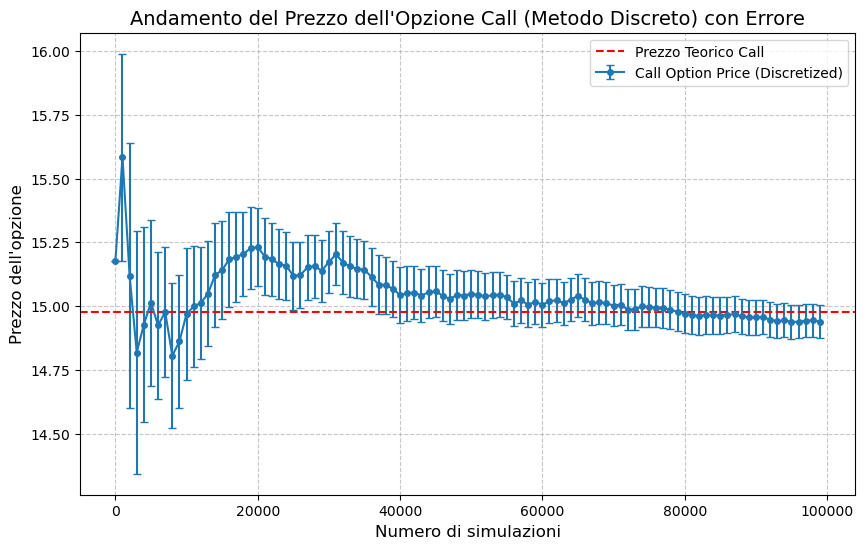

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000          # Numero totale di lanci/simulazioni (come nel C++)
N = 100             # Numero di blocchi (come nel C++)
L = int(M / N)      # Simulazioni per blocco (come nel C++)

# Inizializza liste vuote per memorizzare i due tipi di dati
average = []
error = []

# --- Lettura dei dati dal file ---
# Apri il file in modalità di lettura
try:
    with open('Output_Call_Discretized', 'r') as file:
        for line in file:
            # Suddividi la riga in due parti basandoti su uno spazio
            part1, part2 = line.split()

            # Aggiungi i dati suddivisi alle rispettive liste, convertendo le stringhe in float
            average.append(float(part1))
            error.append(float(part2))
except FileNotFoundError:
    print("ERRORE: Il file 'Output_Call_Discretized' non è stato trovato.")
    print("Assicurati che il codice C++ sia stato compilato ed eseguito")
    print("e che il file 'Output_Call_Discretized' sia nella stessa directory.")
    exit() # Esci dallo script se il file non è presente

# Stampa le due liste separate (utile per il debugging)
# print("Dati medi (Average):", average[:5], "...") # Stampa solo i primi 5 per non appesantire l'output
# print("Dati errore (Error):", error[:5], "...") # Stampa solo i primi 5 per non appesantire l'output
# print(f"Numero di punti dati letti: {len(average)}")

# Converti le liste in array NumPy (vettori)
average = np.array(average)
error = np.array(error)

# --- Preparazione dell'asse x per il plotting ---
# Inizializza x con la lunghezza effettiva dei dati letti (len(average) che sarà uguale a N dal C++),
# quindi moltiplica per L per ottenere il "Time" corretto.
x = np.arange(len(average)) * L

# --- Plotting dei risultati ---
plt.figure(figsize=(10, 6)) # Opzionale: imposta la dimensione della figura
plt.errorbar(x, average, yerr=error, fmt='-o', markersize=4, capsize=3, label='Call Option Price (Discretized)')
plt.axhline(y=14.975790778311286, color='r', linestyle='--', label='Prezzo Teorico Call')
plt.legend()
plt.xlabel('Numero di simulazioni', fontsize=12)
plt.ylabel('Prezzo dell\'opzione', fontsize=12)
plt.title('Andamento del Prezzo dell\'Opzione Call (Metodo Discreto) con Errore', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

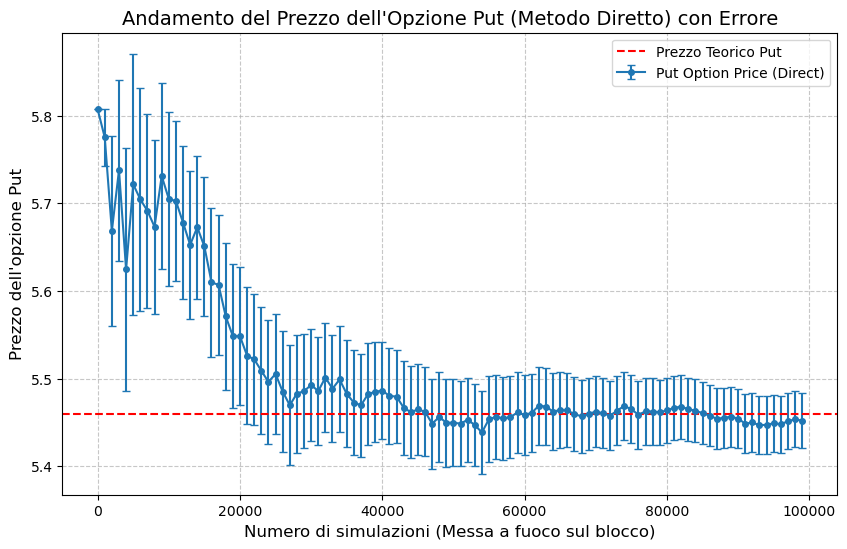

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000          # Numero totale di lanci/simulazioni (come nel C++)
N = 100             # Numero di blocchi (come nel C++)
L = int(M / N)      # Simulazioni per blocco (come nel C++)

# Inizializza liste vuote per memorizzare i due tipi di dati
average = []
error = []

# --- Lettura dei dati dal file ---
# Apri il file in modalità di lettura. Il file è ora 'Output_Put_Direct'.
try:
    with open('Output_Put_Direct', 'r') as file:
        for line in file:
            # Suddividi la riga in due parti basandoti su uno spazio
            part1, part2 = line.split()

            # Aggiungi i dati suddivisi alle rispettive liste, convertendo le stringhe in float
            average.append(float(part1))
            error.append(float(part2))
except FileNotFoundError:
    print("ERRORE: Il file 'Output_Put_Direct' non è stato trovato.")
    print("Assicurati che il codice C++ sia stato compilato ed eseguito")
    print("e che il file 'Output_Put_Direct' sia nella stessa directory.")
    exit() # Esci dallo script se il file non è presente

# Stampa le due liste separate (utile per il debugging)
# print("Dati medi (Average):", average[:5], "...") # Stampa solo i primi 5 per non appesantire l'output
# print("Dati errore (Error):", error[:5], "...") # Stampa solo i primi 5 per non appesantire l'output
# print(f"Numero di punti dati letti: {len(average)}")

# Converti le liste in array NumPy (vettori)
average = np.array(average)
error = np.array(error)

# --- Preparazione dell'asse x per il plotting ---
# Inizializza x con la lunghezza effettiva dei dati letti (len(average) che sarà uguale a N dal C++),
# quindi moltiplica per L per ottenere il "Time" corretto.
x = np.arange(len(average)) * L

# --- Plotting dei risultati ---
plt.figure(figsize=(10, 6)) # Opzionale: imposta la dimensione della figura
# L'etichetta del plot e il titolo sono stati aggiornati per riflettere l'opzione Put.
plt.errorbar(x, average, yerr=error, fmt='-o', markersize=4, capsize=3, label='Put Option Price (Direct)')
plt.axhline(y=5.4595325819072364, color='r', linestyle='--', label='Prezzo Teorico Put')
plt.legend()
plt.xlabel('Numero di simulazioni (Messa a fuoco sul blocco)', fontsize=12)
plt.ylabel('Prezzo dell\'opzione Put', fontsize=12) # Etichetta dell'asse Y aggiornata
plt.title('Andamento del Prezzo dell\'Opzione Put (Metodo Diretto) con Errore', fontsize=14) # Titolo aggiornato
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

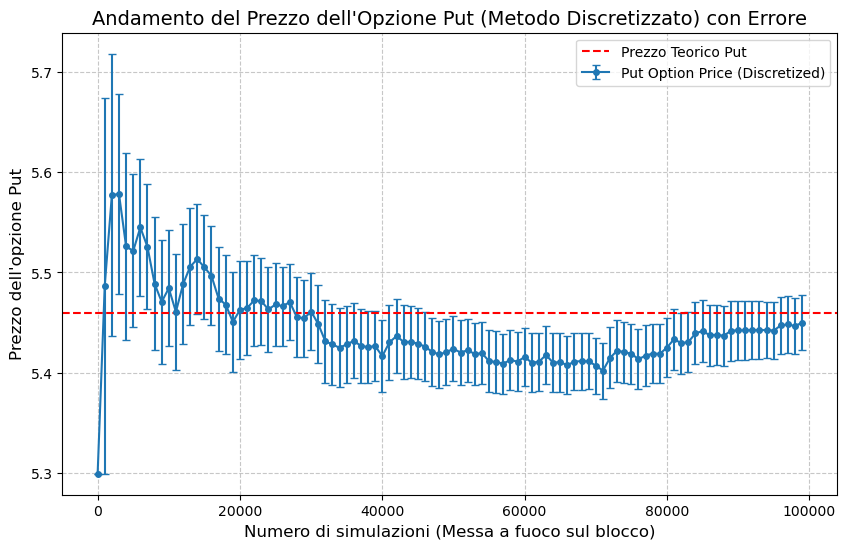

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000          # Numero totale di lanci/simulazioni (come nel C++)
N = 100             # Numero di blocchi (come nel C++)
L = int(M / N)      # Simulazioni per blocco (come nel C++)

# Inizializza liste vuote per memorizzare i dati medi e gli errori
average = []
error = []

# --- Lettura dei dati dal file ---
# Apriamo il file 'Output_Put_Discretized' per leggere i dati.
try:
    with open('Output_Put_Discretized', 'r') as file:
        for line in file:
            # Suddividiamo ogni riga in due parti (media ed errore) basandoci sullo spazio.
            part1, part2 = line.split()

            # Convertiamo le stringhe in numeri floating point e le aggiungiamo alle liste.
            average.append(float(part1))
            error.append(float(part2))
except FileNotFoundError:
    print("ERRORE: Il file 'Output_Put_Discretized' non è stato trovato.")
    print("Assicurati che il tuo codice C++ sia stato compilato ed eseguito correttamente,")
    print("e che il file 'Output_Put_Discretized' si trovi nella stessa directory dello script Python.")
    exit() # Interrompiamo l'esecuzione se il file non viene trovato.

# Stampa le prime righe delle liste (utile per un rapido controllo dei dati)
# print("Dati medi (Average):", average[:5], "...")
# print("Dati errore (Error):", error[:5], "...")
# print(f"Numero totale di punti dati letti: {len(average)}")

# Convertiamo le liste Python in array NumPy per facilitare le operazioni matematiche e il plotting.
average = np.array(average)
error = np.array(error)

# --- Preparazione dell'asse X per il plotting ---
# L'asse X deve riflettere il "tempo" o il numero cumulativo di simulazioni.
# Creiamo un array da 0 alla lunghezza dei dati letti (che è N, il numero di blocchi),
# e moltiplichiamo ogni elemento per L (simulazioni per blocco) per ottenere il conteggio totale delle simulazioni.
x = np.arange(len(average)) * L

# --- Plotting dei risultati ---
plt.figure(figsize=(10, 6)) # Impostiamo la dimensione della figura per una migliore leggibilità.
# Usiamo plt.errorbar per mostrare sia la media che la barra di errore.
# 'fmt='-o'' crea una linea con marcatori a cerchio, 'markersize' e 'capsize' regolano l'aspetto.
plt.errorbar(x, average, yerr=error, fmt='-o', markersize=4, capsize=3, label='Put Option Price (Discretized)')
plt.axhline(y=5.4595325819072364, color='r', linestyle='--', label='Prezzo Teorico Put')
plt.legend()
plt.xlabel('Numero di simulazioni (Messa a fuoco sul blocco)', fontsize=12) # Etichetta per l'asse X.
plt.ylabel('Prezzo dell\'opzione Put', fontsize=12) # Etichetta per l'asse Y specifica per l'opzione Put.
plt.title('Andamento del Prezzo dell\'Opzione Put (Metodo Discretizzato) con Errore', fontsize=14) # Titolo del grafico.
plt.grid(True, linestyle='--', alpha=0.7) # Aggiungiamo una griglia per una migliore lettura.
plt.legend(fontsize=10) # Mostriamo la legenda.
plt.show() # Mostriamo il grafico.

### Analisi dei risultati

I grafici mostrano la stima progressiva del prezzo di opzioni Europee, sia *Call* che *Put*, ottenuta tramite simulazione Monte Carlo. Vengono confrontati due metodi di campionamento del prezzo finale dell'asset $S(T)$: il campionamento diretto e il campionamento di un percorso discretizzato del Moto Browniano Geometrico (GBM). I risultati sono confrontati con la soluzione analitica di Black-Scholes, indicata dalla linea tratteggiata. Le barre d'errore rappresentano la deviazione standard della media, calcolata con il metodo del *data blocking*.

#### Opzione call
* **Campionamento diretto**: La stima del prezzo converge verso il valore teorico all'aumentare del numero di simulazioni. Il valore finale, pur essendo molto vicino, si assesta leggermente al di fuori dell'intervallo di una deviazione standard. La stima rimane comunque pienamente compatibile con il valore atteso entro due deviazioni standard, suggerendo una fluttuazione statistica accettabile.
* **Percorso discretizzato**: Anche il metodo del percorso discretizzato mostra una chiara convergenza. In questo caso, il valore finale della stima è compatibile con la soluzione analitica entro una deviazione standard, indicando un ottimo accordo.

#### Opzione put
* **Campionamento diretto**: La simulazione per l'opzione Put con campionamento diretto converge in modo robusto al valore teorico. La stima finale è in ottimo accordo con la soluzione di Black-Scholes, risultando compatibile entro una deviazione standard.
* **Percorso discretizzato**: Analogamente, il metodo del percorso discretizzato fornisce una stima finale per l'opzione Put che è in eccellente accordo con il prezzo teorico, con una piena compatibilità entro una deviazione standard.

In conclusione, entrambi gli approcci Monte Carlo si dimostrano efficaci nel prezzare opzioni Europee, producendo stime finali compatibili con la teoria analitica.